In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((15.6135,10.893,13.446,22.7025,8.571,10.9035,47.3775,17.457,12.6105,21.7695,16.2825,17.127,24.8805,20.871,12.5835,8.8785,7.143,8.433,38.139,
                 13.506,13.8855,20.625,14.7045,14.331,26.9425,20.511,13.1865,18.45,3.9105,11.8515,21.3015,4.836,9.5775,19.3695,9.1395,10.317,15.3045,9.6975,
                 4.7145,45.54,12.294,10.8225))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,15.6135
1,10.8930
2,13.4460
3,22.7025
4,8.5710


In [2]:
df['tool_copy']=np.tile(np.arange(1, 4), int(len(df)/3))
df['week'] = np.repeat(np.arange(1, 15), 3) #repeate the element of the days array [from 1 to 25] for time each element


In [3]:
j=0
m=0
k=0
x1=np.zeros(14)
x2=np.zeros(14)
x3=np.zeros(14)

for i in range (42):
    if df['tool_copy'][i]==1 :
        x1[j]=df['Xbar'][i]
        j=j+1
    if df['tool_copy'][i]==2 :
        x2[m]=df['Xbar'][i]
        m=m+1
    if df['tool_copy'][i]==3 :
        x3[k]=df['Xbar'][i]
        k=k+1

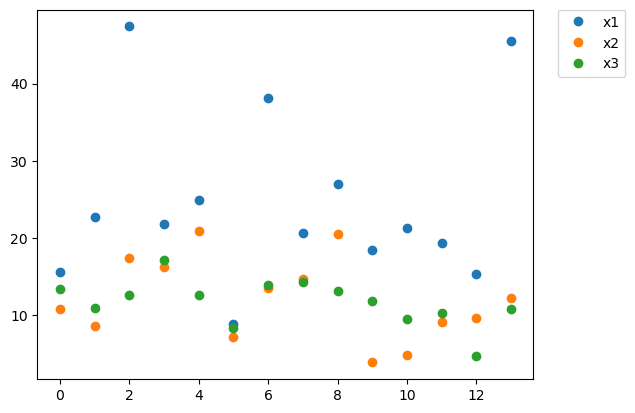

In [4]:
plt.plot(x1, linestyle='none', marker='o', label = 'x1')
plt.plot(x2, linestyle='none', marker='o', label = 'x2')
plt.plot(x3, linestyle='none', marker='o', label = 'x3')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

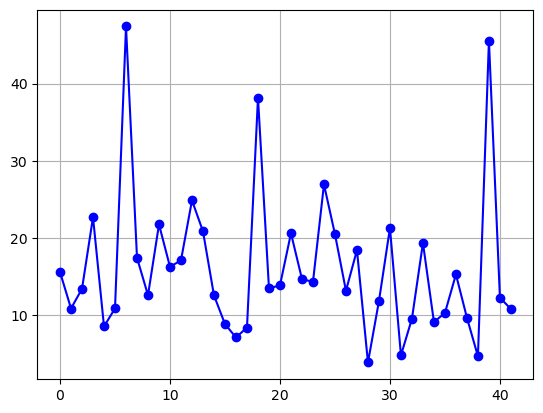

In [5]:
# Plot the data first
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.950


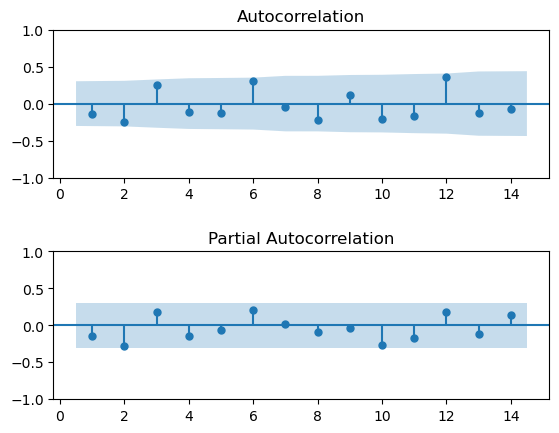

In [6]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


Shapiro-Wilk test p-value = 0.000


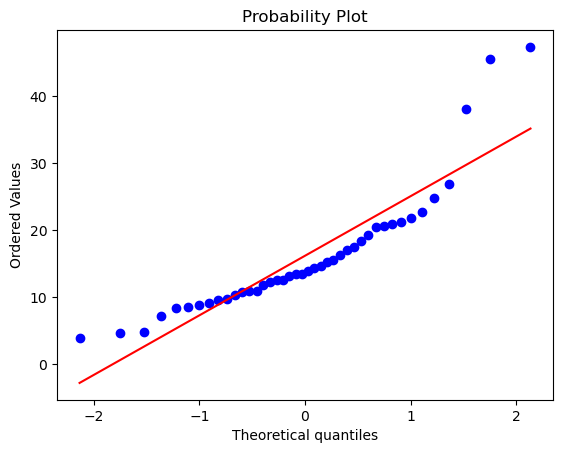

In [7]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df['Xbar'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df['Xbar'], dist="norm", plot=plt)
plt.show()

> Box-cox

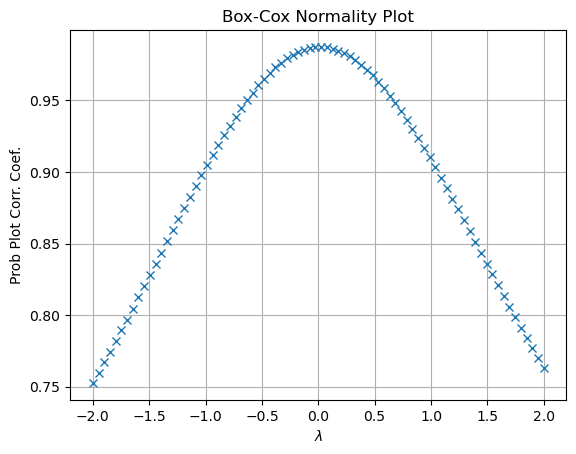

In [8]:
# It is also possible to find the best value of lambda for the transformation
fig = plt.figure()
ax = fig.add_subplot(111)
stats.boxcox_normplot(df['Xbar'], -2, 2, plot=ax)
# add grid
ax.grid(True)

p-value of the Shapiro-Wilk test: 0.554


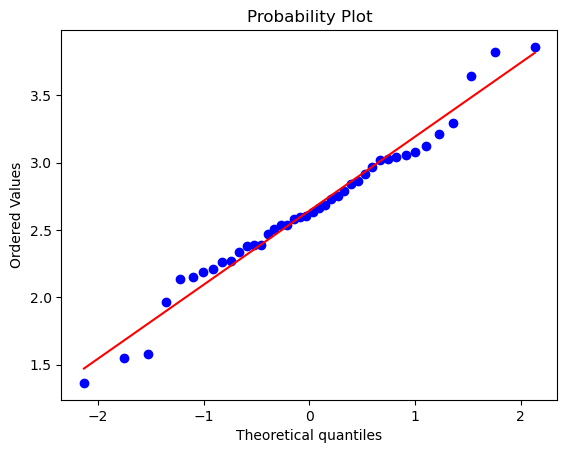

In [9]:
data_normal = stats.boxcox(df['Xbar'], lmbda=0)

_, p_value_SW = stats.shapiro(data_normal)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)


stats.probplot(data_normal, dist="norm", plot=plt)
plt.show()

[data_norm, lmbda] = stats.boxcox(df['Xbar'])
print('Lambda = %.3f' % lmbda)

stat, p_shapiro = stats.shapiro(data_norm)
print('Statistics=%.3f, p=%.3f' % (stat, p_shapiro))
   Plot the qqplot
stats.probplot(data_norm, dist="norm", plot=plt)
plt.show()

   Plot the acf using the statsmodels library
sgt.plot_acf(data_norm, lags = int(len(data_norm)/3), zero=False)
plt.show()

In [10]:
df['dummy']=np.tile(np.array([1, 0, 0]), int(len(df)/3))


In [11]:
# and split the dataset into regressors and target
X = df[['tool_copy','week', 'dummy']]
y =  data_normal

In [12]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term     Coef      P-Value
const 2.404797 4.732786e-29
dummy 0.713254 7.558833e-06

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.423894 0.397815   0.382761

######################################
### Step 2
-------------------
Forward Selection

No predictor added. Exiting stepwise.
-------------------


In [13]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
y =  + 2.405 const + 0.713 dummy

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 2.4048   0.0801  30.0193 4.7328e-29
dummy 0.7133   0.1388   5.1405 7.5588e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.4239 0.3978     0.3828

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS   Adj MS  F-Value    P-Value
Regression  1.0   4.7482   4.7482  26.4248 7.5588e-06
     const  1.0 161.9253 161.9253 901.1581 4.7328e-29
     dummy  1.0   4.7482   4.7482  26.4248 7.5588e-06
     Error 40.0   7.1874   0.1797      NaN        NaN
     Total 41.0  11.9356      NaN      NaN        NaN


Shapiro-Wilk test p-value = 0.101


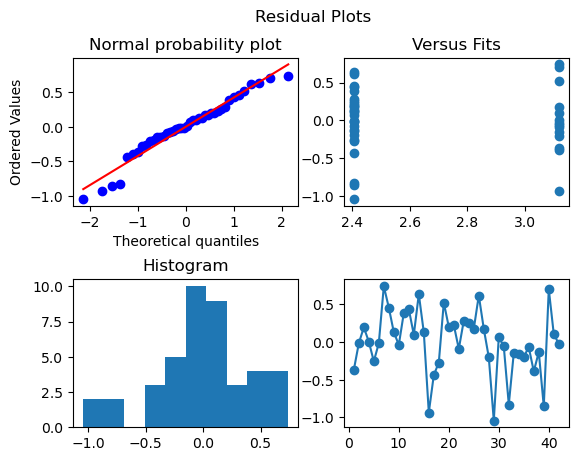

In [14]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.029


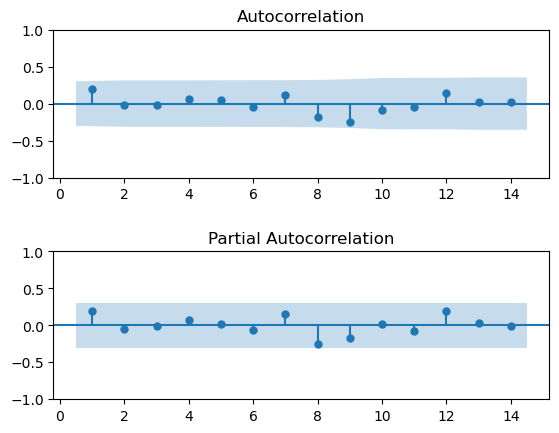

In [15]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

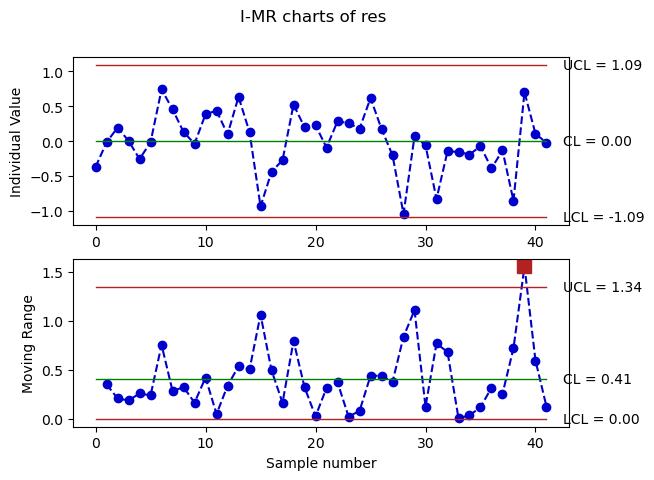

In [16]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

In [24]:
import math
dat=np.zeros(42)
for i in range (42):
    dat[i]=math.exp(results.resid[i])


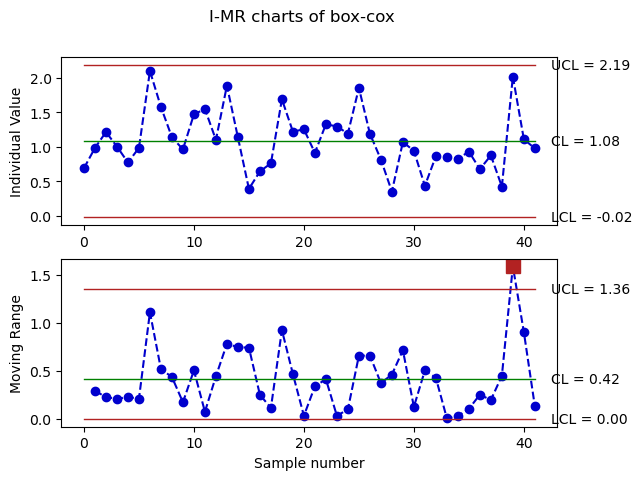

In [25]:
transform = pd.DataFrame(dat, columns=['box-cox'])
df_SCC_IMR = qda.ControlCharts.IMR(transform,'box-cox')